# <font color='firebrick'><center>CONTEXT STATS REPORT</center></font>
### This report details the context stats that have been generated as a result of running the bamstats tool.
<br>


,Total mapped read,Protein coding,Unclassified,Long non-coding RNA,Pseudogenes,Short non-coding RNA,Repeats,Intergenic
Brain-F1-R1,1192074,279997,2300,10617,20977,1183,455685,169510


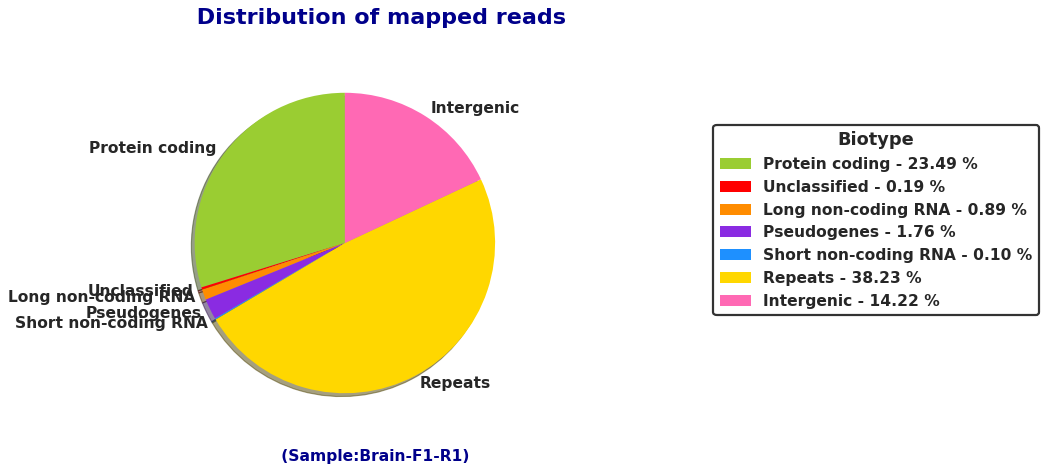

,Total mapped read,Protein coding,UTR,rRNA
Brain-F1-R1,1192074,279996,124848,24


,Total short non-coding RNA,miRNA,misc_RNA,snoRNA,srpRNA,tRNA,other
Brain-F1-R1,1183,121,538,74,159,191,100


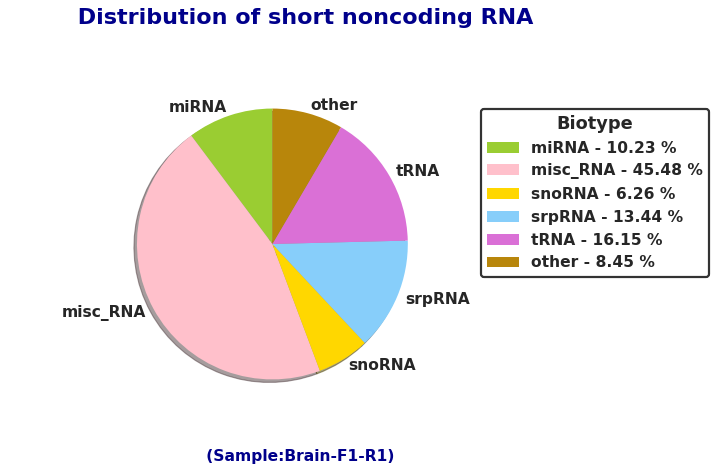

,Total Long non-coding RNA,antisense,lincRNA,other
Brain-F1-R1,10620,7657,2493,470


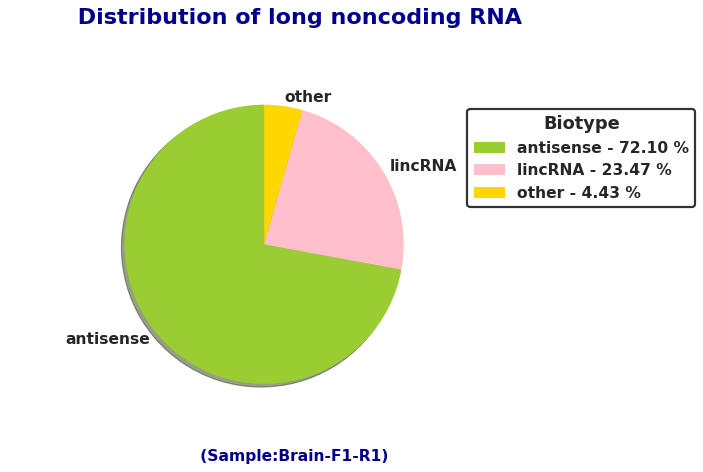

,Total mapped read,Protein coding,Unclassified,Long non-coding RNA,Pseudogenes,Short non-coding RNA,Repeats,Intergenic
Brain-F1-R2,1241349,293272,2358,11214,21681,1277,474051,176577


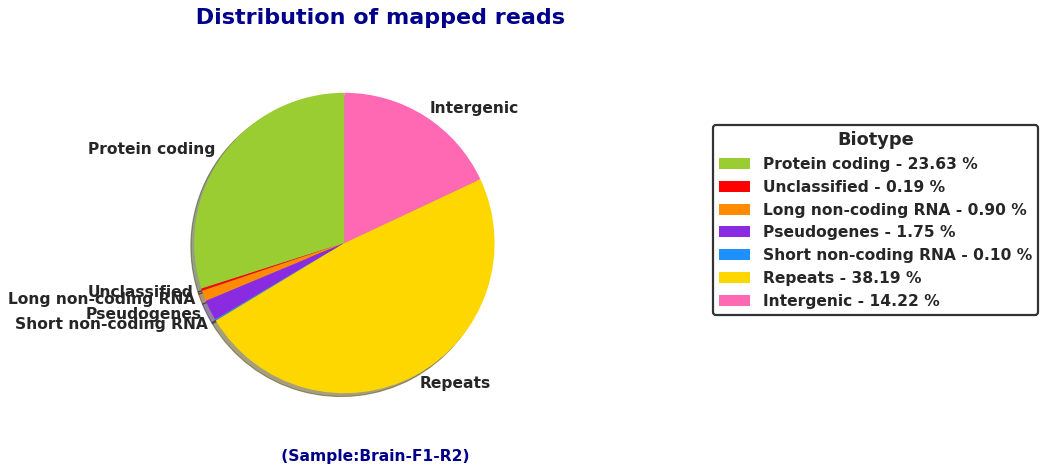

,Total mapped read,Protein coding,UTR,rRNA
Brain-F1-R2,1241349,293269,130458,8


,Total short non-coding RNA,miRNA,misc_RNA,snoRNA,srpRNA,tRNA,other
Brain-F1-R2,1277,128,616,67,152,237,77


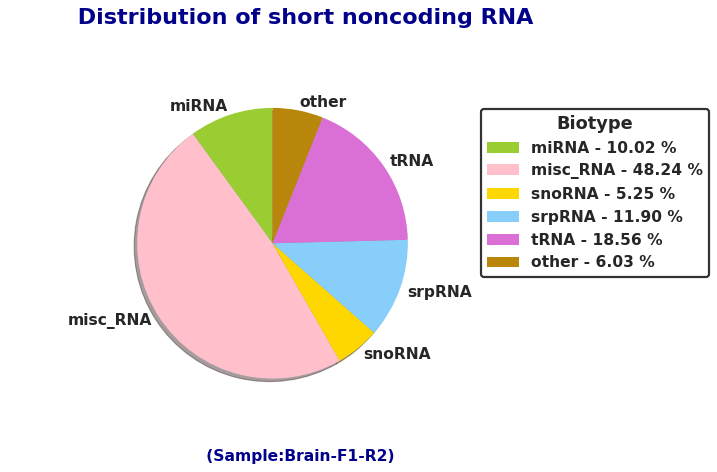

,Total Long non-coding RNA,antisense,lincRNA,other
Brain-F1-R2,11221,8023,2683,515


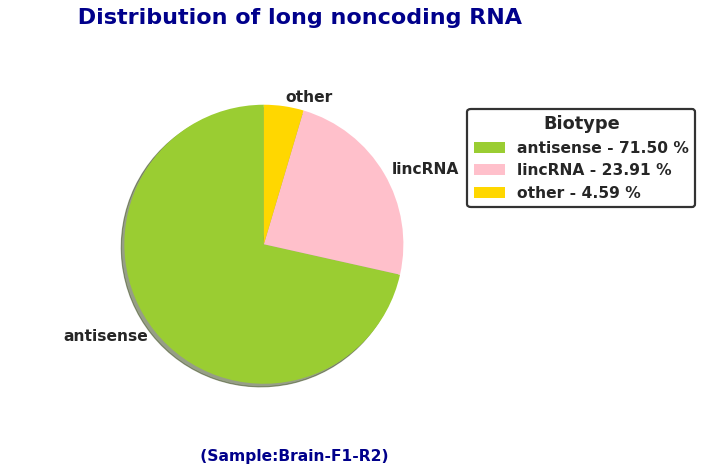

,Total mapped read,Protein coding,Unclassified,Long non-coding RNA,Pseudogenes,Short non-coding RNA,Repeats,Intergenic
Brain-F2-R1,1137384,272294,2303,10371,19503,1133,431129,159190


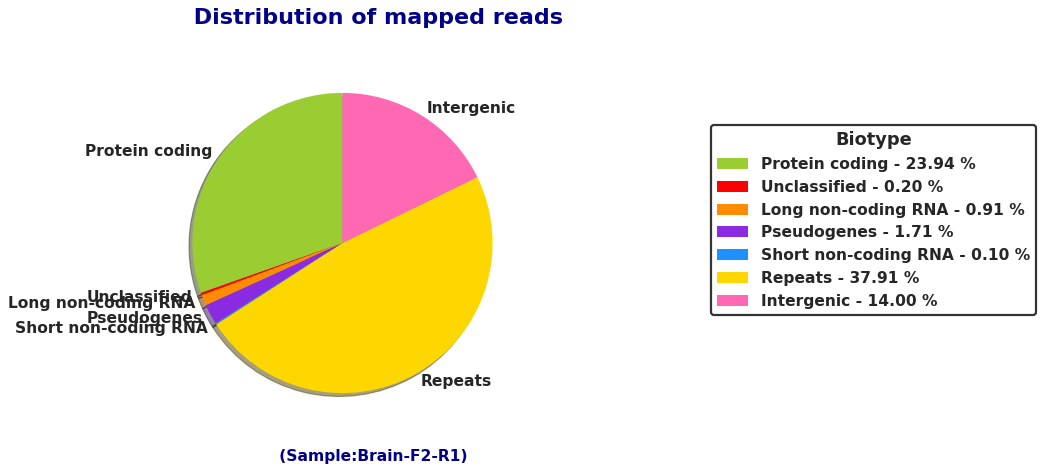

,Total mapped read,Protein coding,UTR,rRNA
Brain-F2-R1,1137384,272291,120489,9


,Total short non-coding RNA,miRNA,misc_RNA,srpRNA,tRNA,other
Brain-F2-R1,1133,100,591,151,178,113


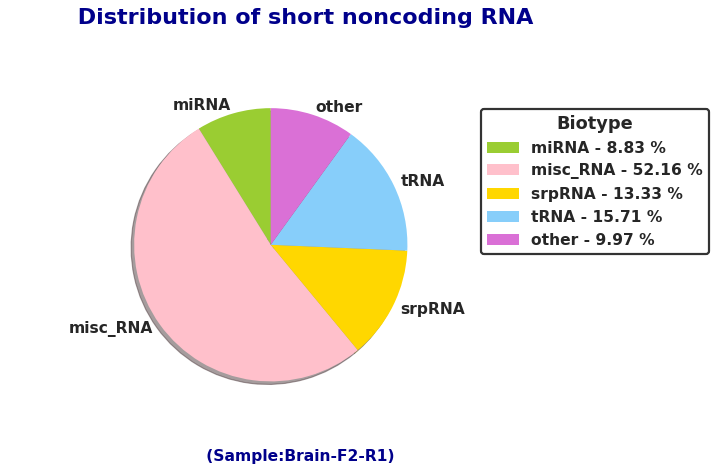

,Total Long non-coding RNA,antisense,lincRNA,other
Brain-F2-R1,10373,7579,2354,440


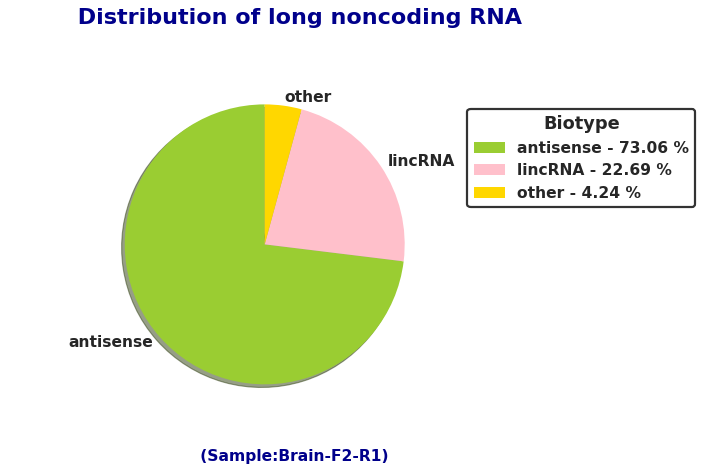

,Total mapped read,Protein coding,Unclassified,Long non-coding RNA,Pseudogenes,Short non-coding RNA,Repeats,Intergenic
Brain-F2-R2,1256621,301663,2301,11529,21287,1324,477583,175690


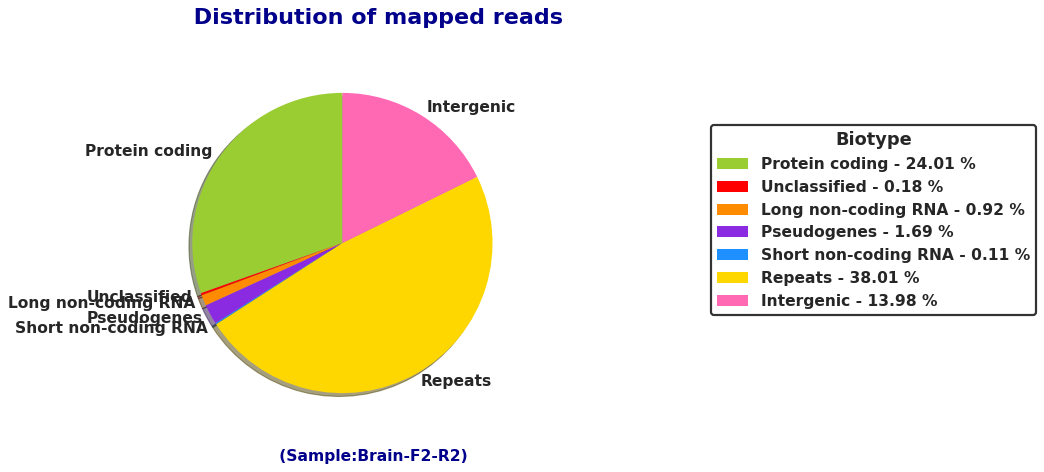

,Total mapped read,Protein coding,UTR,rRNA
Brain-F2-R2,1256621,301661,134141,15


,Total short non-coding RNA,miRNA,misc_RNA,snoRNA,srpRNA,tRNA,other
Brain-F2-R2,1324,136,657,71,166,222,72


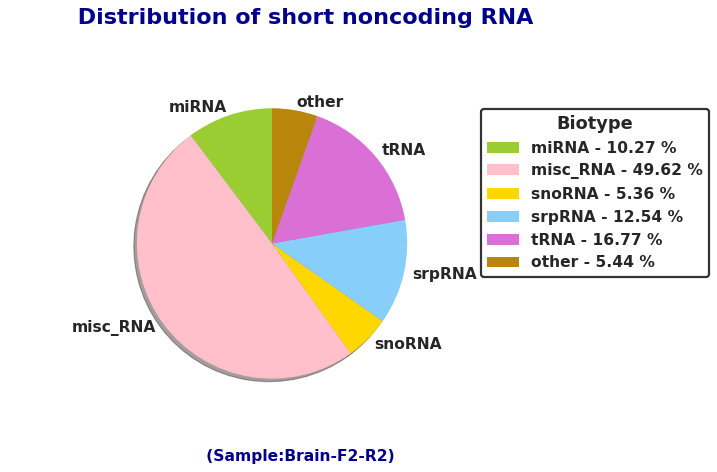

,Total Long non-coding RNA,antisense,lincRNA,other
Brain-F2-R2,11530,8331,2741,458


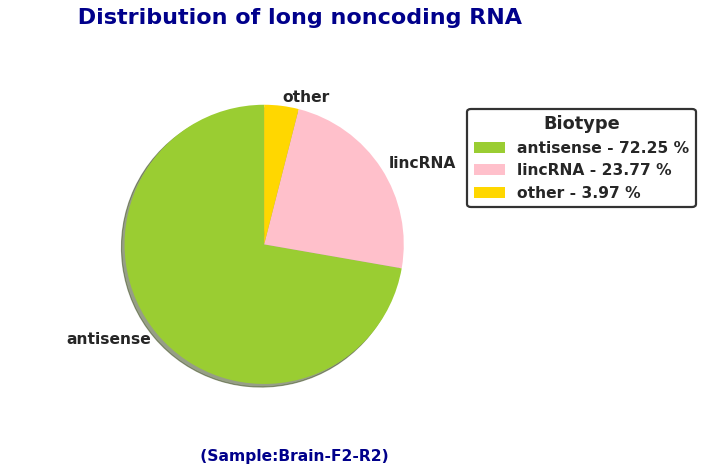

,Total mapped read,Protein coding,Unclassified,Long non-coding RNA,Pseudogenes,Short non-coding RNA,Repeats,Intergenic
UHR-F1-R1,806848,206513,1152,14048,7894,916,320133,95328


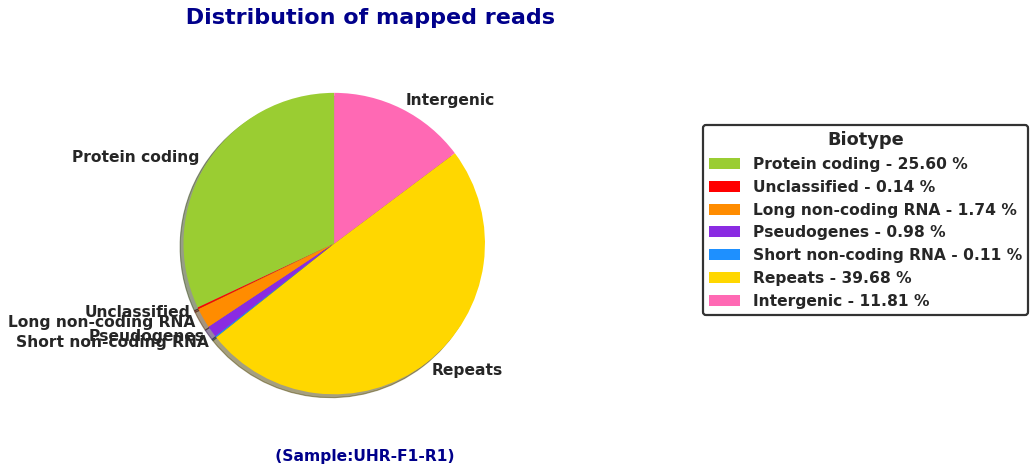

,Total mapped read,Protein coding,UTR,rRNA
UHR-F1-R1,806848,206513,108126,20


,Total short non-coding RNA,miRNA,misc_RNA,snRNA,srpRNA,tRNA,other
UHR-F1-R1,916,77,289,216,172,96,66


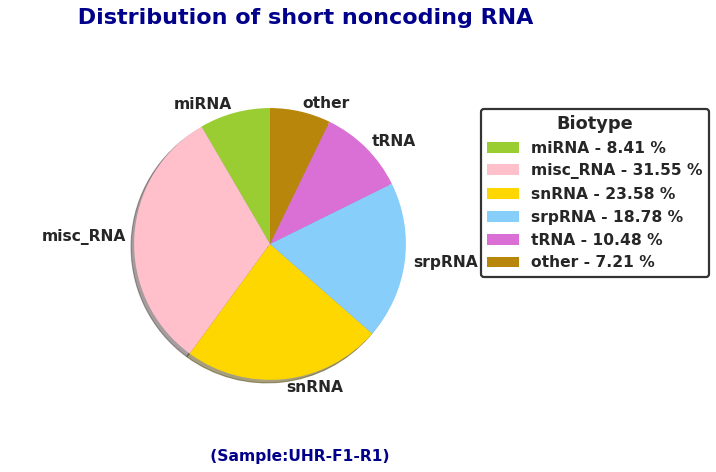

,Total Long non-coding RNA,antisense,lincRNA,other
UHR-F1-R1,14052,11565,2173,314


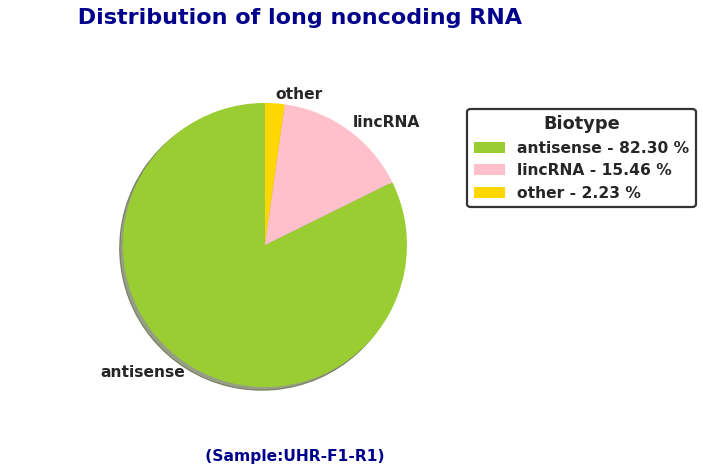

,Total mapped read,Protein coding,Unclassified,Long non-coding RNA,Pseudogenes,Short non-coding RNA,Repeats,Intergenic
UHR-F1-R2,892148,232563,1351,15607,8482,1104,349911,102778


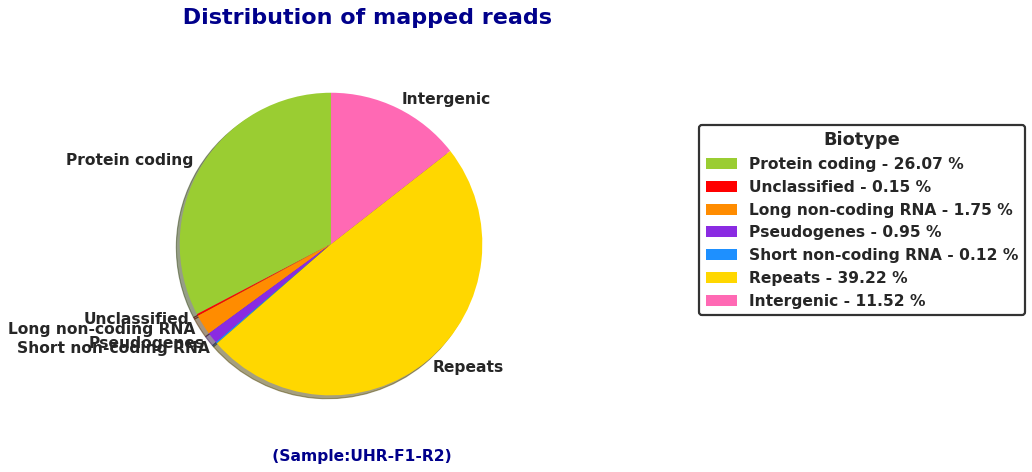

,Total mapped read,Protein coding,UTR,rRNA
UHR-F1-R2,892148,232561,120675,17


,Total short non-coding RNA,miRNA,misc_RNA,snRNA,srpRNA,tRNA,other
UHR-F1-R2,1104,103,348,253,227,118,55


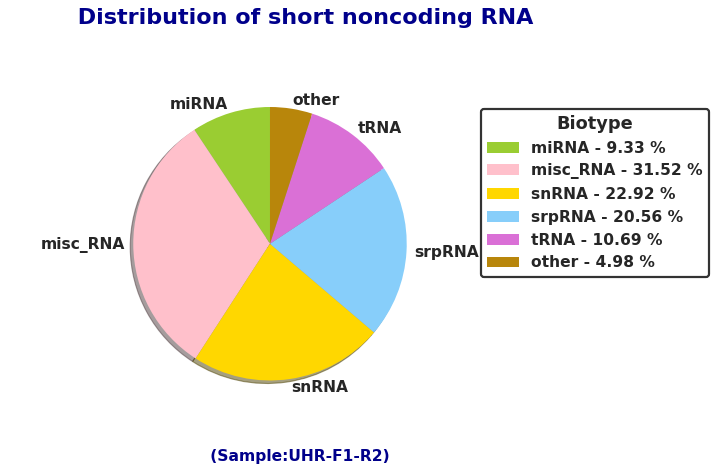

,Total Long non-coding RNA,antisense,lincRNA,other
UHR-F1-R2,15612,13006,2210,396


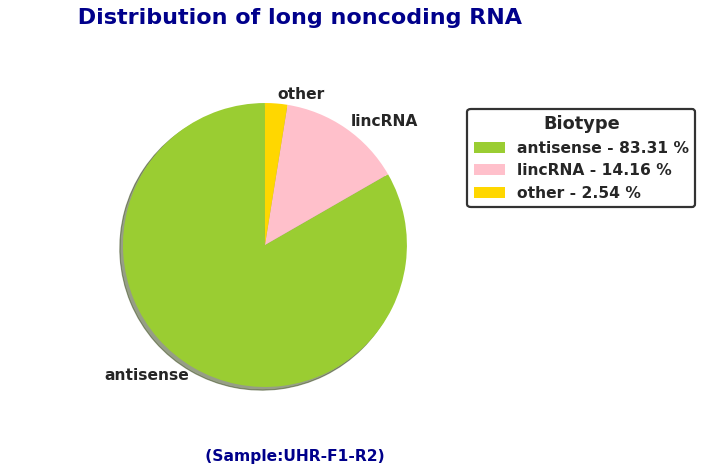

In [1]:
from IPython.display import display, Markdown
from IPython.display import HTML
import IPython.core.display as di
import csv
import numpy as np
import zlib
import CGAT.IOTools as IOTools
import itertools as ITL
import os
import string
import pandas as pd
import sqlite3
import matplotlib as mpl
from matplotlib.backends.backend_pdf import PdfPages  # noqa: E402
#mpl.use('Agg')  # noqa: E402
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
from matplotlib import cm
from matplotlib import rc, font_manager
import CGAT.Experiment as E
import math
from random import shuffle
import matplotlib as mpl
import datetime
import seaborn as sns
import nbformat
%matplotlib inline  


##################################################
#Plot customization
#plt.ioff()
plt.style.use('seaborn-white')
title_font = {'size':'20','color':'darkblue', 'weight':'bold', 'verticalalignment':'bottom'} # Bottom vertical alignment for more space
#For summary page pdf
'''To add description page
plt.figure() 
plt.axis('off')
plt.text(0.5,0.5,"my title",ha='center',va='center')
pdf.savefig()
'''
#Panda data frame cutomization
pd.options.display.width = 80
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

summary_features=['protein_coding_gene','IG_gene','TR_gene',
                  'unclassified_noncoding_RNA','unclassified_RNA',
                  'long_noncoding_RNA','pseudogene',
                  'short_noncoding_RNA','repeats','intergenic']
colors_category = ['yellowgreen', 'pink', 'gold', 'lightskyblue', 
              'orchid','darkgoldenrod','skyblue','b', 'red', 
              'darkorange','grey','violet','magenta','cyan',
              'hotpink','mediumslateblue']
threshold = 5

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

def getTables(dbname):
    '''
    Retrieves the names of all tables in the database.
    Groups tables into dictionaries by annotation
    '''
    dbh = sqlite3.connect(dbname)
    c = dbh.cursor()
    statement = "SELECT name FROM sqlite_master WHERE type='table'"
    c.execute(statement)
    tables = c.fetchall()
    print(tables)
    c.close()
    dbh.close()
    return 

def readDBTable(dbname, tablename):
    '''
    Reads the specified table from the specified database.
    Returns a list of tuples representing each row
    '''
    dbh = sqlite3.connect(dbname)
    c = dbh.cursor()
    statement = "SELECT * FROM %s" % tablename
    c.execute(statement)
    allresults = c.fetchall()
    c.close()
    dbh.close()
    return allresults

def getDBColumnNames(dbname, tablename):
    dbh = sqlite3.connect(dbname)
    res = pd.read_sql('SELECT * FROM %s' % tablename, dbh)
    dbh.close()
    return res.columns

def fancyPiePlot(list_to_plot,list_label,samplename,name,colors,s1,s2):

    fig=plt.figure(figsize=(6, 6), dpi=80)
    patches, autotexts = plt.pie(list_to_plot, colors=colors,labels=list_label,labeldistance=1.06,
                                autopct=None,shadow=True, startangle=90,textprops={'weight': 'bold','fontsize':'16'})
    for i in range(0,len(autotexts)):
            autotexts[i].set_fontsize(14)
    #texts.set_fontsize(14)
    #for i, a in enumerate(autotexts):
       # a.set_text("{}".format((str(round(list_to_plot[i],2))+"%")))
    plt.axis('equal')
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(list_label, list_to_plot)]
    legend_properties = {'weight':'bold','size':'14'}
    leg = plt.legend(patches,labels,title="Biotype",prop=legend_properties,bbox_to_anchor=(s1,s2),frameon=True)
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(2)
    leg.get_title().set_fontsize(16)
    leg.get_title().set_fontweight('bold')
    plt.title(''.join(["         Distribution of ",name,"\n\n"]), **title_font)
    plt.xlabel(''.join(["\n\n           (Sample:",samplename,")"]),size=14,color='darkblue',weight='bold')
    plt.tight_layout()
    #plt.savefig(''.join([samplename,'_',name,'.png']),bbox_inches='tight',pad_inches=0.6)
    plt.show()
    plt.close()
    print("\n")
    return fig
    
def fancy_donut_plot(list_to_plot,list_label,samplename,name,colors,s1,s2):

    plt.figure(figsize=(6, 6), dpi=80)
    if(flag ==1):
          patches, autotexts = plt.pie(list_to_plot, colors=colors,labels=list_label,labeldistance=1.05,
                                       autopct=None,shadow=True, startangle=90,textprops={'weight': 'bold','fontsize':'16'})
    else:
  
          patches, autotexts = plt.pie(list_to_plot,labeldistance=1.07,colors=colors,
                                       autopct=None,shadow=True, startangle=90,textprops={'weight': 'bold','fontsize':'12'})
    for i in range(0,len(autotexts)):
            autotexts[i].set_fontsize(14)
    #texts.set_fontsize(14)
    #for i, a in enumerate(autotexts):
       # a.set_text("{}".format((str(round(list_to_plot[i],2))+"%")))
    
    # For Donut chart.
    centre_circle = plt.Circle((0,0),0.56,color='black', fc='white',linewidth=1.25)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.axis('equal')
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(list_label, list_to_plot)]
    legend_properties = {'weight':'bold','size':'14'}
    leg = plt.legend(patches,labels,title="Biotype",prop=legend_properties,bbox_to_anchor=(s1,s2),frameon=True)
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(2)
    leg.get_title().set_fontsize(16)
    leg.get_title().set_fontweight('bold')
    plt.title(''.join(["         Distribution of ",name,"\n\n"]), **title_font)
    plt.xlabel(''.join(["\n\n           (Sample:",samplename,")"]),size=14,color='darkblue',weight='bold')
    plt.tight_layout()
    #plt.savefig(''.join([samplename,'_',name,'.png']),bbox_inches='tight',pad_inches=0.6)
    plt.show()

def filtrationThreshold(list_to_plot,list_label,name_sample,name_total,name_caption):
    list_to_plot_copy=[]
    list_label_copy=[]
    list_to_display=[]
    list_label_to_display=[]
    total_rna = sum(list_to_plot)
    other = 0
    for ii in range(0,len(list_to_plot)):
        c = (list_to_plot[ii]*100)/total_rna
        if(c<threshold):
            other = other + list_to_plot[ii]
    
    for ii in range(0,len(list_to_plot)):
        c = (list_to_plot[ii]*100)/total_rna
        if(c>=threshold):
            list_to_plot_copy.append(c)
            list_label_copy.append(list_label[ii])
            list_to_display.append(list_to_plot[ii])
            list_label_to_display.append(list_label[ii])
    list_to_plot_copy.append(((other*100)/total_rna))
    list_label_copy.append('other')
    list_to_display.append(other)
    list_label_to_display.append('other')
    displayTable(name_sample,list_label_to_display,list_to_display,name_total,total_rna,name_caption)
    return list_to_plot_copy,list_label_copy

    
def shortNoncodingRNA(df,trans,index,pdf):
    list_to_plot=[]
    list_label=[]
    for i in trans:
        line = i
        if(line.find("RNA") > -1 and line.find("pseudogene")== -1):
            if("ncRNA" in line):
                continue
            if("coding" in line):
                continue
            if("unclassified" in line):
                continue
            if(line == "RNA"):
                continue
            if(line.find("_RTE") > -1 or line.find("_Deu") > -1):
                continue
            list_to_plot.append(df.loc[line][index])
            list_label.append(line)
    
    list_to_plot,list_label = filtrationThreshold(list_to_plot,list_label,df.loc['track'][index],
                                                  "Total short non-coding RNA","Short non-coding RNA")
    fig = fancyPiePlot(list_to_plot,list_label,df.loc['track'][index],"short noncoding RNA",colors_category,1.17, 0.94)
    #fig.set_size_inches(11.69,8.27)
    #pdf.savefig(fig,bbox_inches='tight',pad_inches=0.6)
    return pdf

    
def longNoncodingRNA(df,trans,index,pdf):
    list_to_plot=[]
    list_label=[]
    for i in trans:
        line = i
        if(line.find("RNA") > -1 and line.find("pseudogene")== -1):
            if("coding" in line):
                continue
            if("unclassified" in line):
                continue
            if(line == "RNA"):
                continue
            if(line.find("_RTE") > -1 or line.find("_Deu") > -1):
                continue
            if("ncRNA" in line): 
                    list_to_plot.append(df.loc[line][index])
                    list_label.append(line)
        if("antisense" in line or "overlapping" in line):
                 list_to_plot.append(df.loc[line][index])
                 list_label.append(line)
        if(line == "non_coding"):
                list_to_plot.append(df.loc[line][index])
                list_label.append(line)
        if("intron" in line):
            if(len(line)>7):
                list_to_plot.append(df.loc[line][index])
                list_label.append(line)
    list_to_plot,list_label = filtrationThreshold(list_to_plot,list_label,df.loc['track'][index],
                                                  "Total Long non-coding RNA","Long non-coding RNA")
    fig = fancyPiePlot(list_to_plot,list_label,df.loc['track'][index],"long noncoding RNA",colors_category,1.12, 0.94)
    #pdf.savefig(fig,bbox_inches='tight',pad_inches=0.6)
    return pdf

def displayTable(d_index,list_label,list_to_plot,c,total,name):
    list_to_plot_copy=[]
    list_label_copy=[]
    list_to_plot_copy.append(total)
    list_label_copy.append(c)
    for i in range(0,len(list_label)):
        list_to_plot_copy.append(list_to_plot[i])
        list_label_copy.append(list_label[i])
    df2 = pd.DataFrame([list_to_plot_copy],columns=list_label_copy,index=[d_index])
    
    # Display table
    styles = [
    hover(),
    dict(selector="th", props=[("font-size", "130%"),
                               ("text-align", "center"),
                              ]),                               
    dict(selector="td", props=[("font-size", "120%"),
                               ("text-align", "center"),
                              ]),
    dict(selector="caption", props=[("caption-side", "top"),
                                   ("text-align", "center"),
                                   ("font-size", "100%")])
    ]
    df2 = (df2.style.set_table_styles(styles).set_caption(name))
    display(df2)
    print("\n\n")

def contextStatsReport(dbname, tablename):
    trans = pd.DataFrame(readDBTable(dbname,tablename))
    trans.columns = getDBColumnNames(dbname,tablename)
    df = trans.T
    list_to_plot=[]
    list_label=['Protein coding','Unclassified',
                'Long non-coding RNA','Pseudogenes',
                'Short non-coding RNA', 'Repeats',
                'Intergenic']
    list_label_rna=['Protein coding',
                        'UTR','rRNA']
    for i in range(0,df.shape[1]):
        #pdf=PdfPages(str("_".join([df.loc['track'][i],"context_stat_summary.pdf"])))
        c=0
        for j in range(0,len(summary_features)):
            if(j==3 or j>=5):
                list_to_plot.append(c)
                c = 0
            c = c+ df.loc[summary_features[j]][i]
        list_to_plot.append(c)
        print("\n\n")
        displayTable(df.loc['track'][i],list_label,list_to_plot,'Total mapped read',df.loc['total'][i],"Full context stats")
        
        for ii in range(0,len(list_to_plot)):
            list_to_plot[ii] = (list_to_plot[ii]*100)/df.loc['total'][i]       
        colors = ['yellowgreen', 'red', 'darkorange', 'blueviolet','dodgerblue','gold','hotpink']
        fig=fancyPiePlot(list_to_plot,list_label,df.loc['track'][i],"mapped reads",colors,2.3, 0.89)
        #pdf.savefig(fig,bbox_inches='tight',pad_inches=0.6)
        list_to_plot=[]
        a1 = (df.loc['protein_coding'][i]*100)/df.loc['total'][i]
        #a2= (df.loc['introns'][i]*100)/df.loc['total'][i]
        a2= (df.loc['UTR'][i]*100)/df.loc['total'][i]
        a3= (df.loc['rRNA'][i]*100)/df.loc['total'][i]
        list_to_plot =[a1,a2,a3]
        list_for_plot = [df.loc['protein_coding'][i],df.loc['UTR'][i],df.loc['rRNA'][i]]
        
        displayTable(df.loc['track'][i],list_label_rna,list_for_plot,'Total mapped read',df.loc['total'][i],"RNA seq metrices")
        
        colors = ['yellowgreen', 'hotpink','gold','dodgerblue']
        #fig=fancyPiePlot(list_to_plot,list_label_rna,df.loc['track'][i],"mapped reads\n       (RNA seq metrices)",colors,1.1, 0.89)
        #pdf.savefig(fig,bbox_inches='tight',pad_inches=0.6)
        list_to_plot=[]
        shortNoncodingRNA(df,trans.columns,i,pdf)
        longNoncodingRNA(df,trans,i,pdf)
        #pdf.close()
        
#getTables("csvdb")
contextStatsReport("../csvdb","context_stats")




